In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
Happiness = pd.read_csv("/content/drive/MyDrive/cursoDS/Visualización de datos con Python/carpeta/Happiness_report.csv")
Metadata = pd.read_csv("/content/drive/MyDrive/cursoDS/Visualización de datos con Python/carpeta/Metadata.csv")


Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

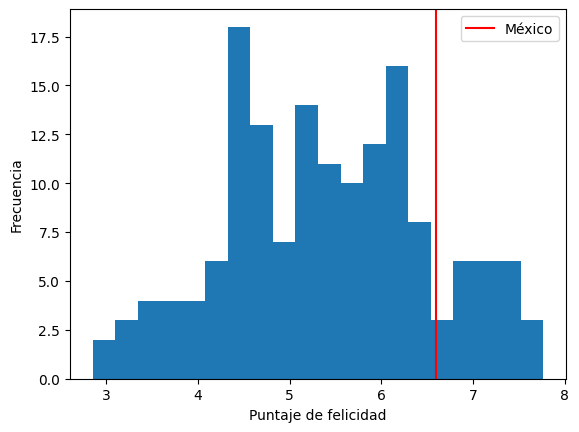

In [9]:
mexico = Happiness[Happiness["Country or region"] == "Mexico"]


plt.hist(Happiness["Score"], bins=20)
plt.xlabel("Puntaje de felicidad")
plt.ylabel("Frecuencia")
plt.axvline(mexico["Score"].values[0], color="r", label="México")
plt.legend()
plt.show()


Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

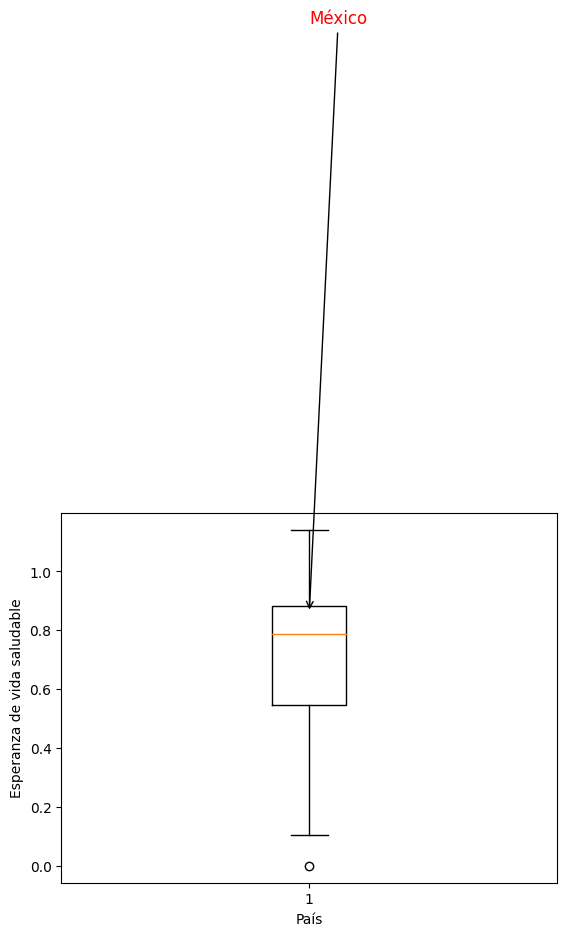

In [10]:
plt.boxplot(Happiness["Healthy life expectancy"])
plt.xlabel("País")
plt.ylabel("Esperanza de vida saludable")

mexico_life_expectancy = mexico["Healthy life expectancy"].values[0]

# Ajusta la longitud de la flecha con "mutation_scale"
plt.annotate("México", xy=(1, mexico_life_expectancy),
            xytext=(1, mexico_life_expectancy + 2),
            arrowprops=dict(arrowstyle="->"),
            fontsize=12, color="red")

plt.show()


Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México

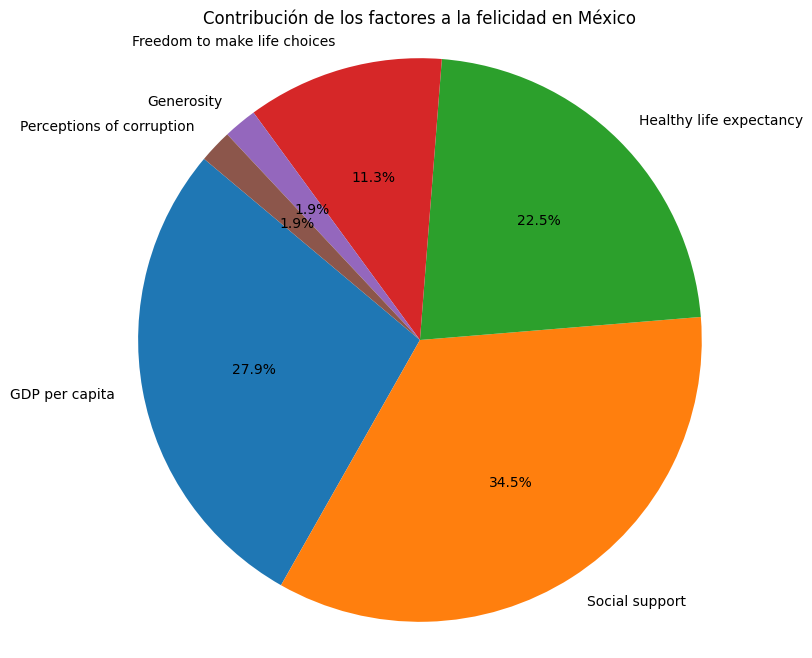

In [11]:
mexico_contrib = mexico.drop(["Country or region", "Score", "Overall rank"], axis=1)
mexico_contrib = mexico_contrib.div(mexico_contrib.sum(axis=1), axis=0) * 100

mexico_contrib.columns = ["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

# Crear la gráfica circular (pie chart)
plt.figure(figsize=(8, 8))
plt.pie(mexico_contrib.iloc[0], labels=mexico_contrib.columns, autopct='%1.1f%%', startangle=140)
plt.title("Contribución de los factores a la felicidad en México")
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()


Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores. Ejemplo:

<Figure size 1000x600 with 0 Axes>

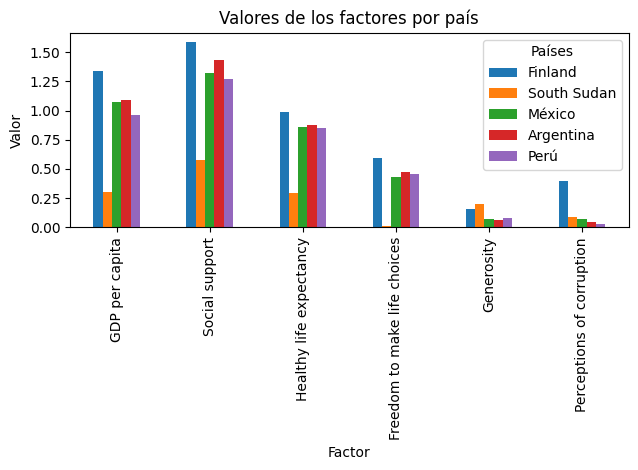

In [12]:
# Seleccionar los países de interés
primero = Happiness.sort_values("Score", ascending=False).head(1)
ultimo = Happiness.sort_values("Score", ascending=True).head(1)
paises_interes = ["Argentina", "Peru"]
paises_seleccionados = pd.concat([primero, ultimo, mexico, Happiness[Happiness["Country or region"].isin(paises_interes)]])

# Seleccionar los factores y transponer el DataFrame
factores = paises_seleccionados.drop(["Country or region", "Score", "Overall rank"], axis=1).T

# Crear el gráfico de barras
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
factores.plot(kind='bar', rot=90)

# Agregar etiquetas y leyenda
plt.xlabel("Factor")
plt.ylabel("Valor")
plt.title("Valores de los factores por país")

# Definir etiquetas para la leyenda
etiquetas_paises = ["Finland", "South Sudan", "México", "Argentina", "Perú"]

# Agregar la leyenda con las etiquetas personalizadas
plt.legend(etiquetas_paises, title="Países", loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.




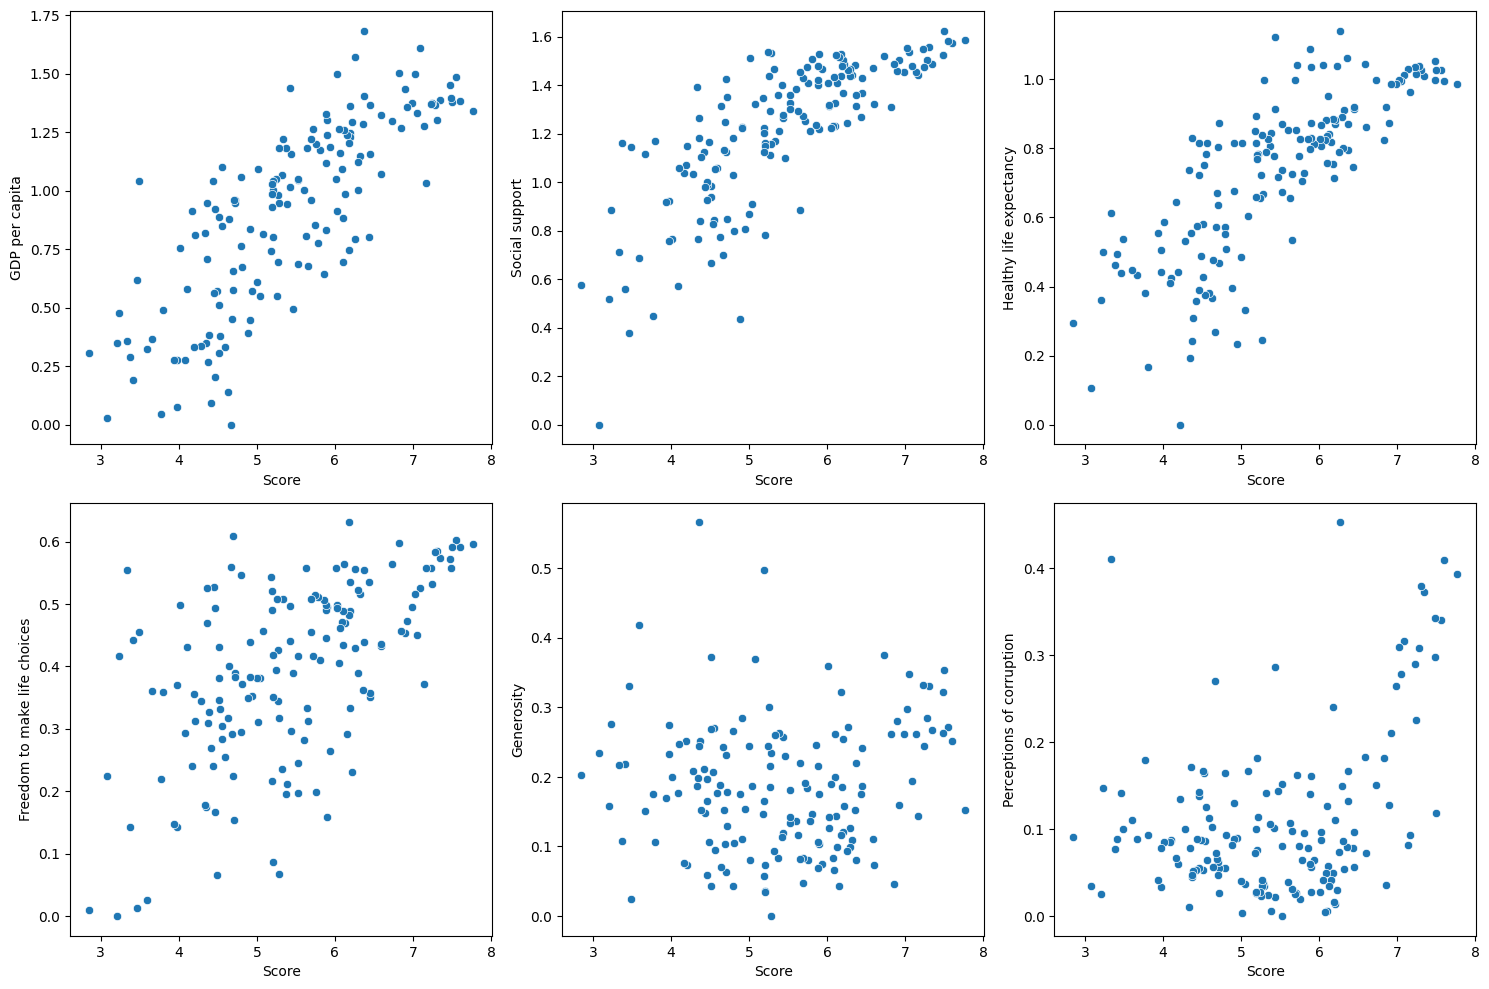

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, factor in enumerate(Happiness.columns[3:]):
    sns.scatterplot(x="Score", y=factor, data=Happiness, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel("Score")
    axes[i // 3, i % 3].set_ylabel(factor)

plt.tight_layout()
plt.show()


Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

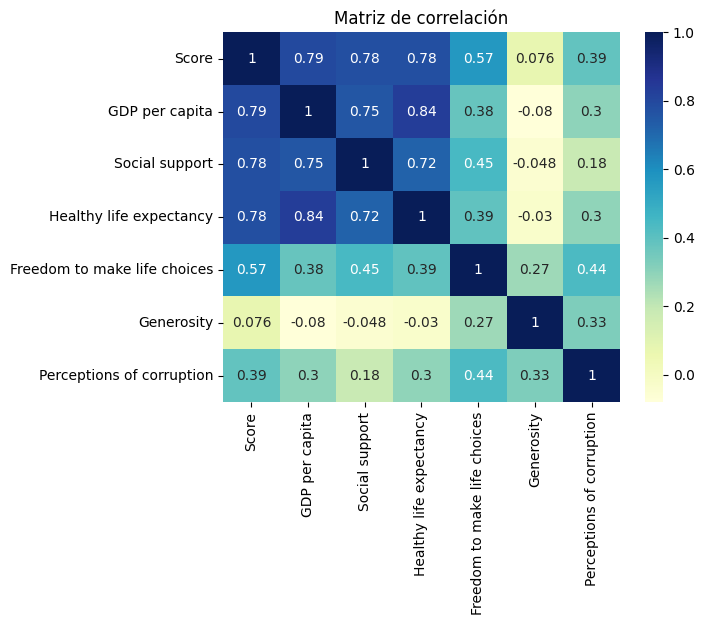

In [14]:
corr = Happiness.drop(["Country or region", "Overall rank"], axis=1).corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Matriz de correlación")
plt.show()


Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [15]:
Metadata = Metadata.rename(columns={'TableName': 'Country or region'})

In [16]:
dataframe_combinado = pd.merge(Metadata, Happiness, on='Country or region', how="inner")


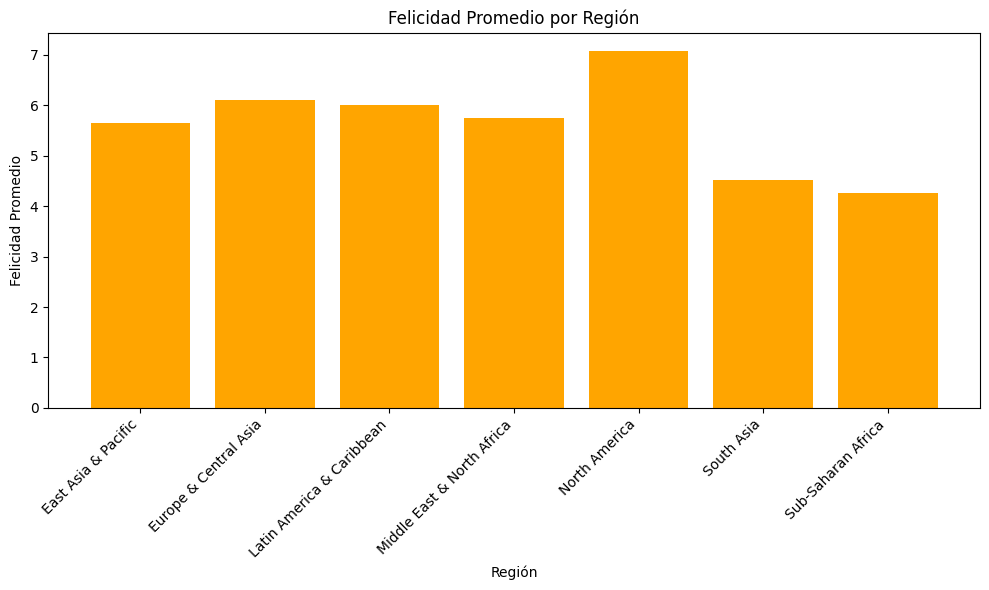

In [17]:
felicidad_promedio_por_region = dataframe_combinado.groupby('Region')['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(felicidad_promedio_por_region['Region'], felicidad_promedio_por_region['Score'], color='orange')
plt.xlabel('Región')
plt.ylabel('Felicidad Promedio')
plt.title('Felicidad Promedio por Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
